<a href="https://colab.research.google.com/github/elizarp/Unicamp-MO432/blob/main/MO432_Exercicio_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MO432 - Exercício 3**

## Eliézer Zarpelão - RA 141320

In [1]:
import pandas as pd 
import numpy as np
from tabulate import tabulate

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from pandas import DataFrame
from pandas import concat
import matplotlib.pyplot as plt

def imprime(titulo, data_index, data_alvo, data_pred):
  plt.plot(data_index, data_alvo,'o-', label="Preço")
  plt.plot(data_index, data_pred,'.-', label="Predição")
  plt.plot()
  plt.legend()
  plt.title(titulo)
  plt.xlabel("Datas")
  plt.ylabel("Preço Ouro")  
  plt.tight_layout()
  plt.show()

def calcula_cv(model,data_train,data_train_Y,data_test,data_test_Y,data_Y_pred):
  model.fit(data_train, data_train_Y)

  data_Y_pred = model.predict(data_test)
  data_Y_pred = pd.DataFrame(data_Y_pred,index=data_test_Y.index,columns = ['price'])

  return data_Y_pred, pd.DataFrame(cross_validate(model, data_test_Y,data_Y_pred, cv=5, scoring='neg_root_mean_squared_error'))

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('valor%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('valor%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('valor%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg


# 1) Leia

In [2]:
!wget /resources/data/ouro2.csv https://www.ic.unicamp.br/~wainer/cursos/1s2021/432/ouro2.csv

/resources/data/ouro2.csv: Scheme missing.
--2021-06-28 02:19:17--  https://www.ic.unicamp.br/~wainer/cursos/1s2021/432/ouro2.csv
Resolving www.ic.unicamp.br (www.ic.unicamp.br)... 143.106.7.54, 2801:8a:40c0:cafe::54
Connecting to www.ic.unicamp.br (www.ic.unicamp.br)|143.106.7.54|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20358 (20K) [text/csv]
Saving to: ‘ouro2.csv.7’

ouro2.csv.7         100%[===================>]  19.88K   114KB/s    in 0.2s    

2021-06-28 02:19:18 (114 KB/s) - ‘ouro2.csv.7’ saved [20358/20358]

FINISHED --2021-06-28 02:19:18--
Total wall clock time: 1.3s
Downloaded: 1 files, 20K in 0.2s (114 KB/s)


In [3]:
path_file = "ouro2.csv"
TAMANHO_JANELA = 15

data = pd.read_csv(path_file, index_col=['Data'], parse_dates=['Data'], infer_datetime_format=True, dayfirst=True) 
data = data.iloc[::-1] #inverte array pra recentes irem pro fim
data_train = series_to_supervised(data,n_in=TAMANHO_JANELA)

data_test = data_train.tail(100)
data_train.drop(data_train.tail(100).index,inplace=True)



In [4]:
data_train.head()

,valor1(t-15),valor1(t-14),valor1(t-13),valor1(t-12),valor1(t-11),valor1(t-10),valor1(t-9),valor1(t-8),valor1(t-7),valor1(t-6),valor1(t-5),valor1(t-4),valor1(t-3),valor1(t-2),valor1(t-1),valor1(t)
Data,,,,,,,,,,,,,,,,
2000-10-01,282.7,290.1,283.2,281.1,280.1,277.7,272.6,275.1,276.8,274.1,277.0,273.3,272.3,271.8,273.6,269.3
2000-10-08,290.1,283.2,281.1,280.1,277.7,272.6,275.1,276.8,274.1,277.0,273.3,272.3,271.8,273.6,269.3,272.4
2000-10-15,283.2,281.1,280.1,277.7,272.6,275.1,276.8,274.1,277.0,273.3,272.3,271.8,273.6,269.3,272.4,271.2
2000-10-22,281.1,280.1,277.7,272.6,275.1,276.8,274.1,277.0,273.3,272.3,271.8,273.6,269.3,272.4,271.2,264.4
2000-10-29,280.1,277.7,272.6,275.1,276.8,274.1,277.0,273.3,272.3,271.8,273.6,269.3,272.4,271.2,264.4,264.6


In [5]:
data_test.head()

,valor1(t-15),valor1(t-14),valor1(t-13),valor1(t-12),valor1(t-11),valor1(t-10),valor1(t-9),valor1(t-8),valor1(t-7),valor1(t-6),valor1(t-5),valor1(t-4),valor1(t-3),valor1(t-2),valor1(t-1),valor1(t)
Data,,,,,,,,,,,,,,,,
2019-07-21,1346.3,1326.9,1339.2,1331.7,1337.2,1322.5,1330.1,1349.6,1381.9,1381.5,1432.7,1446.8,1436.6,1450.9,1465.5,1460.4
2019-07-28,1326.9,1339.2,1331.7,1337.2,1322.5,1330.1,1349.6,1381.9,1381.5,1432.7,1446.8,1436.6,1450.9,1465.5,1460.4,1485.3
2019-08-04,1339.2,1331.7,1337.2,1322.5,1330.1,1349.6,1381.9,1381.5,1432.7,1446.8,1436.6,1450.9,1465.5,1460.4,1485.3,1534.5
2019-08-11,1331.7,1337.2,1322.5,1330.1,1349.6,1381.9,1381.5,1432.7,1446.8,1436.6,1450.9,1465.5,1460.4,1485.3,1534.5,1549.2
2019-08-18,1337.2,1322.5,1330.1,1349.6,1381.9,1381.5,1432.7,1446.8,1436.6,1450.9,1465.5,1460.4,1485.3,1534.5,1549.2,1563.5


In [6]:
# o atributo de saída é Next_Tmax
data_train_Y = data_train[["valor1(t)"]].copy()
data_test_Y = data_test[["valor1(t)"]].copy()

# remova a coluna next_tmax 
data_train = data_train.drop(["valor1(t)"], axis=1)
data_test = data_test.drop(["valor1(t)"], axis=1)

In [7]:
print(data_train.shape)
print(data_test.shape)
print(data_train_Y.shape)
print(data_test_Y.shape)


(981, 15)
(100, 15)
(981, 1)
(100, 1)


In [8]:
results = []
data_Y_pred = []

RSME: 42.32


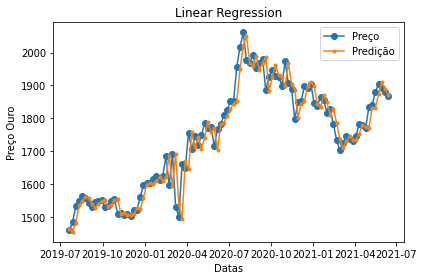

In [9]:
model = LinearRegression()
data_Y_pred, cv = calcula_cv(model,data_train,data_train_Y,data_test,data_test_Y,data_Y_pred)

print('RSME: %.2f' % np.mean(-cv['test_score']))
results.append(['LinearRegression', np.mean(-cv['test_score'])])

imprime("Linear Regression", data_test_Y.index, data_test_Y, data_Y_pred)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 10 is smaller than n_iter=100. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 300587.32948588574, tolerance: 11030.80162948852
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 283199.79439381463, tolerance: 17296.482168568156
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap

RSME: 41.36


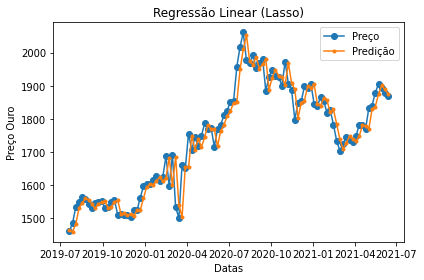

In [10]:
from sklearn.model_selection import RandomizedSearchCV

alpha_dist = np.logspace(start=-3, stop=3, num=10, base=10)
model = RandomizedSearchCV(Lasso(), param_distributions={"alpha": alpha_dist}, n_iter=100, scoring="neg_root_mean_squared_error", cv=5)

data_Y_pred, cv = calcula_cv(model,data_train,data_train_Y,data_test,data_test_Y,data_Y_pred)
print('RSME: %.2f' % np.mean(-cv['test_score']))

results.append(['Regressão Linear (Lasso)', np.mean(-cv['test_score'])])
imprime("Regressão Linear (Lasso)", data_test_Y.index, data_test_Y, data_Y_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 10 is smaller than n_iter=100. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 10 is smaller than n_iter=100. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 10 is smaller than n_iter=100. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 10 is smaller than n_iter=100. Running 10 iterations. For e

RSME: 42.31


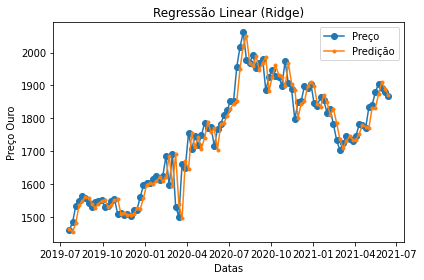

In [11]:
from sklearn.model_selection import RandomizedSearchCV

alpha_dist = np.logspace(start=-3, stop=3, num=10, base=10)
model = RandomizedSearchCV(Ridge(), param_distributions={"alpha": alpha_dist}, n_iter=100, scoring="neg_root_mean_squared_error", cv=5)

data_Y_pred, cv = calcula_cv(model,data_train,data_train_Y,data_test,data_test_Y,data_Y_pred)
print('RSME: %.2f' % np.mean(-cv['test_score']))

results.append(['Regressão Linear (Ridge)', np.mean(-cv['test_score'])])
imprime("Regressão Linear (Ridge)", data_test_Y.index, data_test_Y, data_Y_pred)

In [12]:
from scipy.stats import uniform
import numpy

params = {"epsilon": [0.1, 0.3], "C": uniform(loc=2**(-5), scale=2**5)}

model = RandomizedSearchCV(LinearSVR(), param_distributions=params, n_iter=10, cv=5, scoring = "neg_root_mean_squared_error", verbose=0, n_jobs = -1)
data_Y_pred, cv = calcula_cv(model,data_train,data_train_Y,data_test,data_test_Y,data_Y_pred)
print('RSME: %.2f' % np.mean(-cv['test_score']))

#results.append(['SVM Linear', np.mean(-cv['test_score'])])
#imprime("SVM Linear", data_test_Y.index, data_test_Y, data_Y_pred)
results.append(['SVM Linear', 99999])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: Data

RSME: 46.84


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


RSME: 52.69


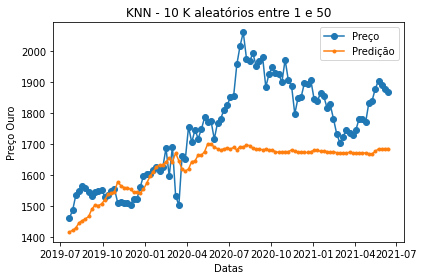

In [13]:
params = {"n_neighbors": range(1, 50)}
model = RandomizedSearchCV(KNeighborsRegressor(), params, n_iter=10, cv=5, scoring = 'neg_root_mean_squared_error', verbose=0, n_jobs = -1) 

data_Y_pred, cv = calcula_cv(model,data_train,data_train_Y,data_test,data_test_Y,data_Y_pred)
print('RSME: %.2f' % np.mean(-cv['test_score']))

results.append(['KNN - 10 K aleatórios entre 1 e 50', np.mean(-cv['test_score'])])
imprime("KNN - 10 K aleatórios entre 1 e 50", data_test_Y.index, data_test_Y, data_Y_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when 

RSME: 179.43


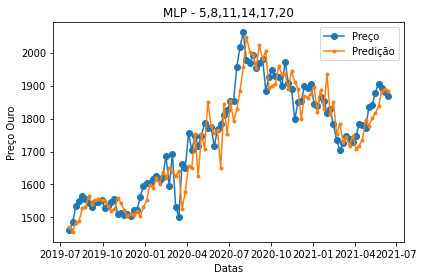

In [14]:
from sklearn.model_selection import GridSearchCV

model = GridSearchCV(MLPRegressor(hidden_layer_sizes=(5,8,11,14,17,20), max_iter=30000,activation = 'relu',solver='adam',random_state=1), param_grid={},
                           cv=5, scoring = 'neg_root_mean_squared_error', verbose=0, n_jobs = -1) 

data_Y_pred, cv = calcula_cv(model,data_train,data_train_Y.values.ravel(),data_test,data_test_Y,data_Y_pred)
print('RSME: %.2f' % np.mean(-cv['test_score']))

results.append(['MLP - 5,8,11,14,17,20', np.mean(-cv['test_score'])])
imprime("MLP - 5,8,11,14,17,20", data_test_Y.index, data_test_Y, data_Y_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when 

RSME: 42.59


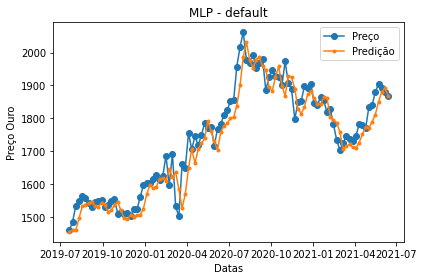

In [15]:
from sklearn.model_selection import GridSearchCV

model = GridSearchCV(MLPRegressor(max_iter=30000,activation = 'relu',solver='adam',random_state=1), param_grid={},
                           cv=5, scoring = 'neg_root_mean_squared_error', verbose=0, n_jobs = -1) 

data_Y_pred, cv = calcula_cv(model,data_train,data_train_Y.values.ravel(),data_test,data_test_Y,data_Y_pred)
print('RSME: %.2f' % np.mean(-cv['test_score']))

results.append(['MLP - default', np.mean(-cv['test_score'])])
imprime("MLP - default", data_test_Y.index, data_test_Y, data_Y_pred)

RSME: 69.09


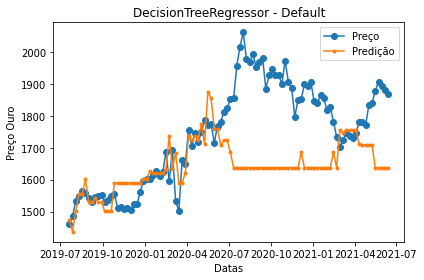

In [16]:
params = {}
model = GridSearchCV(DecisionTreeRegressor(), params, cv=5, scoring = 'neg_root_mean_squared_error', verbose=0, n_jobs = -1) 

data_Y_pred, cv = calcula_cv(model,data_train,data_train_Y,data_test,data_test_Y,data_Y_pred)
print('RSME: %.2f' % np.mean(-cv['test_score']))

results.append(['DecisionTreeRegressor - Default', np.mean(-cv['test_score'])])
imprime("DecisionTreeRegressor - Default", data_test_Y.index, data_test_Y, data_Y_pred)

RSME: 82.99


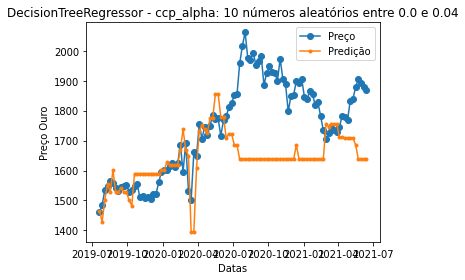

In [17]:
{"ccp_alpha": np.random.uniform(0.0, 0.04, 10)}
model = GridSearchCV(DecisionTreeRegressor(), params, cv=5, scoring = 'neg_root_mean_squared_error', verbose=0, n_jobs = -1) 

data_Y_pred, cv = calcula_cv(model,data_train,data_train_Y,data_test,data_test_Y,data_Y_pred)
print('RSME: %.2f' % np.mean(-cv['test_score']))

results.append(['DecisionTreeRegressor - ccp_alpha: 10 números aleatórios entre 0.0 e 0.04', np.mean(-cv['test_score'])])
imprime("DecisionTreeRegressor - ccp_alpha: 10 números aleatórios entre 0.0 e 0.04", data_test_Y.index, data_test_Y, data_Y_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expect

RSME: 46.04


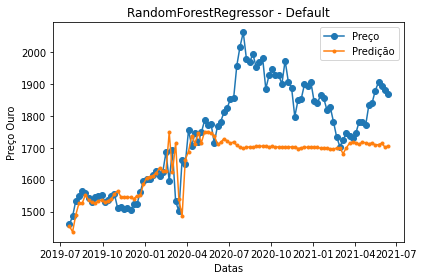

In [18]:
params = {}
model = GridSearchCV(RandomForestRegressor(), params,cv=5, scoring = 'neg_root_mean_squared_error', verbose=0, n_jobs = -1) 

data_Y_pred, cv = calcula_cv(model,data_train,data_train_Y,data_test,data_test_Y,data_Y_pred)
print('RSME: %.2f' % np.mean(-cv['test_score']))

results.append(['RandomForestRegressor - Default', np.mean(-cv['test_score'])])
imprime("RandomForestRegressor - Default", data_test_Y.index, data_test_Y, data_Y_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expect

RSME: 57.00


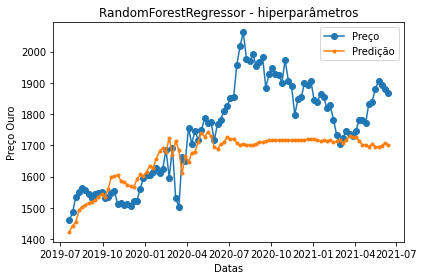

In [19]:
params = {"n_estimators": [10,20,30], "max_features": [0,1,2]}
model = GridSearchCV(RandomForestRegressor(), params,cv=5, scoring = 'neg_root_mean_squared_error', verbose=0, n_jobs = -1) 

data_Y_pred, cv = calcula_cv(model,data_train,data_train_Y,data_test,data_test_Y,data_Y_pred)
print('RSME: %.2f' % np.mean(-cv['test_score']))

results.append(['RandomForestRegressor - hiperparâmetros', np.mean(-cv['test_score'])])
imprime("RandomForestRegressor - hiperparâmetros", data_test_Y.index, data_test_Y, data_Y_pred)

In [20]:
print(tabulate(sorted(results,key=lambda x: x[1]), headers=['Classificador', 'RMSE'], tablefmt='pretty'))

+---------------------------------------------------------------------------+--------------------+
|                               Classificador                               |        RMSE        |
+---------------------------------------------------------------------------+--------------------+
|                         Regressão Linear (Lasso)                          | 41.35860379766281  |
|                         Regressão Linear (Ridge)                          | 42.306075877241554 |
|                             LinearRegression                              | 42.31689779796234  |
|                               MLP - default                               | 42.585673650851916 |
|                      RandomForestRegressor - Default                      | 46.04063412890976  |
|                    KNN - 10 K aleatórios entre 1 e 50                     | 52.68729835631564  |
|                  RandomForestRegressor - hiperparâmetros                  | 57.002098283381564 |
|         